In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

       popularity  acousticness      energy    liveness       tempo  \
count  991.000000  9.910000e+02  991.000000  991.000000  991.000000   
mean     1.409233  9.684246e-03    0.016898    0.005908    3.482932   
std      1.699760  1.501855e-02    0.018349    0.008692    3.444739   
min      0.000000  2.840000e-08    0.000013    0.000013    0.020503   
25%      0.264297  5.269630e-04    0.003764    0.001226    0.988636   
50%      0.824176  3.371429e-03    0.010389    0.003160    2.402855   
75%      1.881438  1.214861e-02    0.024417    0.006678    4.842839   
max     12.715517  1.083750e-01    0.154175    0.116722   22.741250   

       speechiness  instrumentalness  time_signature  danceability  \
count   991.000000        991.000000      991.000000    991.000000   
mean      0.002339          0.004193        0.114373      0.016781   
std       0.003948          0.013174        0.111940      0.017875   
min       0.000010          0.000000        0.000231      0.000041   
25%       

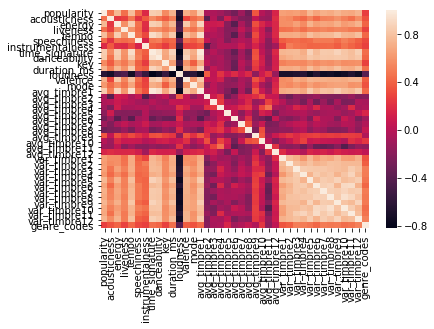

In [3]:
dataframe = pd.read_csv("validation_features_triplets.csv")
#dataframe = pd.read_csv("playlist_data_scaled_final11_30am.csv", delimiter='|') 
print(dataframe.describe())
corr = dataframe.corr()
print(corr)
corr.to_csv('correlations_approach2.csv', sep=',')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Text(0,0.5,'explained_variance_ratio_')

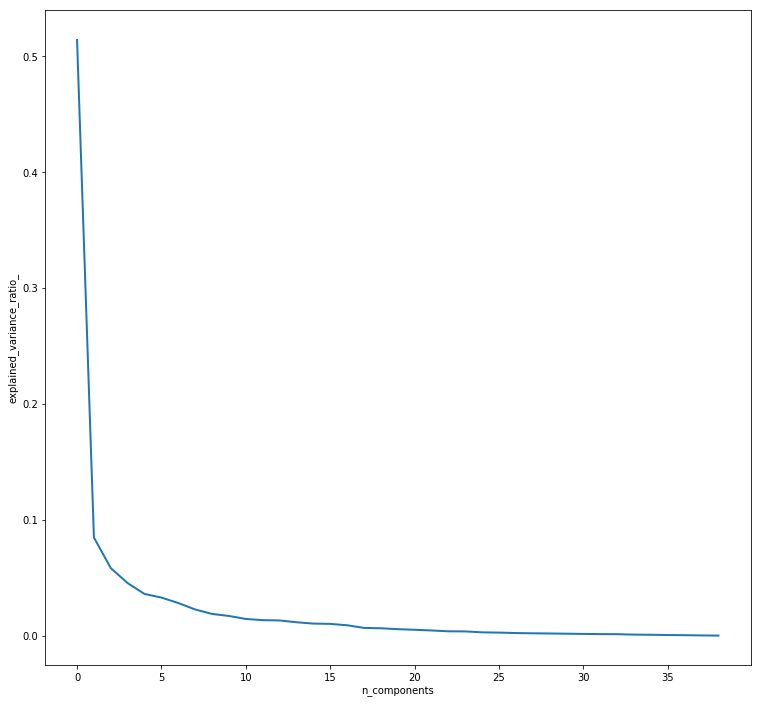

In [10]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("training_features_triplets.csv")
data = data.drop(['userID'], axis=1) 
z_scaler = StandardScaler()
z_scaler.fit(data)
data = z_scaler.transform(data)
pca = PCA()
pca.fit(data)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

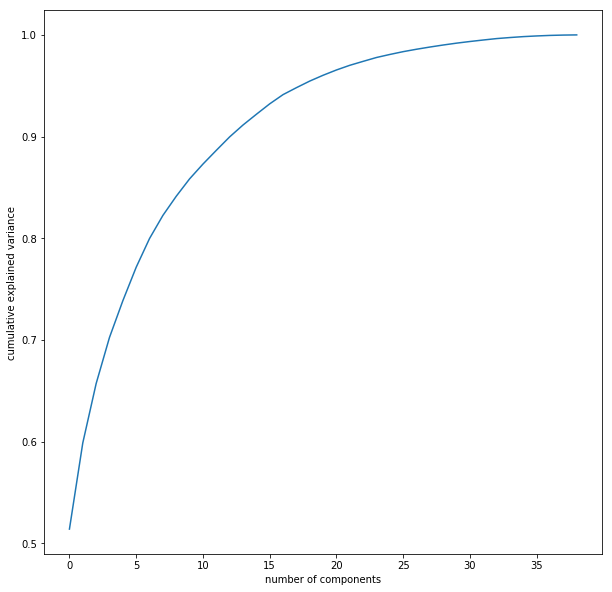

In [16]:
import numpy as np
pca = PCA().fit(data)
plt.figure(1, figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');